## Class illustration. Rainfall as an Instrument

In [2]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import seaborn as sns
from linearmodels.iv import IV2SLS

Loading in the Miguel et al data

In [3]:
mss = pd.read_stata("mss_repdata.dta")
mss

,ccode,year,country_name,country_code,GPCP,GPCP_l,GPCP_l2,GPCP_g,GPCP_g_l,GPCP_g_fl,...,muni,state,author,stconst,fh_civ,fh_pol,S,W,WoverS,soc
0,540.0,1981-01-01,Angola,AGO,839.215759,911.847290,1021.776855,-0.079653,-0.107587,0.155680,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
1,540.0,1982-01-01,Angola,AGO,969.864563,839.215759,911.847290,0.155680,-0.079653,-0.034482,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
2,540.0,1983-01-01,Angola,AGO,936.421631,969.864563,839.215759,-0.034482,0.155680,0.059925,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
3,540.0,1984-01-01,Angola,AGO,992.536255,936.421631,969.864563,0.059925,-0.034482,-0.018277,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
4,540.0,1985-01-01,Angola,AGO,974.396118,992.536255,936.421631,-0.018277,0.059925,0.216019,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,552.0,1995-01-01,Zimbabwe,ZWE,493.448456,465.000092,680.722412,0.061179,-0.316902,0.513642,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
739,552.0,1996-01-01,Zimbabwe,ZWE,746.904236,493.448456,465.000092,0.513642,0.061179,0.044380,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
740,552.0,1997-01-01,Zimbabwe,ZWE,780.051941,746.904236,493.448456,0.044380,0.513642,-0.181482,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
741,552.0,1998-01-01,Zimbabwe,ZWE,638.486389,780.051941,746.904236,-0.181482,0.044380,0.094420,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0


What is the bivariate relationship between GDP growth and civil war?

In [11]:
smf.ols('any_prio ~ gdp_g', data=mss).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               any_prio   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.837
Date:                Wed, 27 Oct 2021   Prob (F-statistic):              0.176
Time:                        16:11:51   Log-Likelihood:                -448.13
No. Observations:                 743   AIC:                             900.3
Df Residuals:                     741   BIC:                             909.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2664      0.016     16.356      0.000       0.234       0.298
gdp_g         -0.3117      0.230     -1.355      0.176      -0.763       0.140
==============================================================================
Omnibus:                      186.343   Durbin-Watson:                   0.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.548
Skew:                           1.049   Prob(JB):                     1.37e-35
Kurtosis:                       2.113   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is a negative relationship, but it isn't super strong. For example, going from 0%  to 10% annual growth (a huge change) only leads to about a 3% increase in the chance of a civil war. 

Now let's look at  the analysis with the rainfall instrument. First, the graph from lecture:

<AxesSubplot:xlabel='GPCP_g', ylabel='gdp_g'>

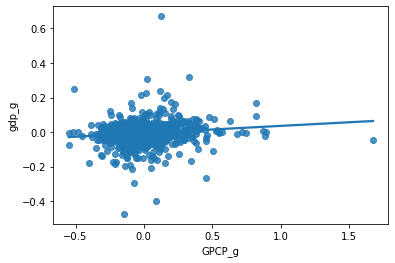

In [13]:
sns.regplot(x='GPCP_g', y='gdp_g', data=mss, ci=0)

In regression form, also including the previous year rainfall growth

In [14]:
smf.ols('gdp_g ~ GPCP_g + GPCP_g_l', data=mss).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gdp_g   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     8.912
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           0.000150
Time:                        16:14:14   Log-Likelihood:                 923.53
No. Observations:                 743   AIC:                            -1841.
Df Residuals:                     740   BIC:                            -1827.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0061      0.003     -2.375      0.018      -0.011      -0.001
GPCP_g         0.0554      0.013      4.126      0.000       0.029       0.082
GPCP_g_l       0.0341      0.014      2.502      0.013       0.007       0.061
==============================================================================
Omnibus:                      233.849   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8701.616
Skew:                           0.693   Prob(JB):                         0.00
Kurtosis:                      19.708   Cond. No.                         6.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The reduced form (for any conflict)

In [15]:
smf.ols('any_prio ~ GPCP_g + GPCP_g_l', data=mss).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               any_prio   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.008
Date:                Wed, 27 Oct 2021   Prob (F-statistic):              0.366
Time:                        16:14:20   Log-Likelihood:                -448.04
No. Observations:                 743   AIC:                             902.1
Df Residuals:                     740   BIC:                             915.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2697      0.016     16.449      0.000       0.238       0.302
GPCP_g        -0.0288      0.085     -0.339      0.735      -0.196       0.138
GPCP_g_l      -0.1204      0.086     -1.397      0.163      -0.290       0.049
==============================================================================
Omnibus:                      189.379   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.939
Skew:                           1.044   Prob(JB):                     1.86e-35
Kurtosis:                       2.104   Cond. No.                         6.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For wars with over 1000 deaths:

In [16]:
smf.ols('war_prio ~ GPCP_g + GPCP_g_l', data=mss).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               war_prio   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.200
Date:                Wed, 27 Oct 2021   Prob (F-statistic):              0.302
Time:                        16:14:29   Log-Likelihood:                -320.10
No. Observations:                 743   AIC:                             646.2
Df Residuals:                     740   BIC:                             660.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1697      0.014     12.292      0.000       0.143       0.197
GPCP_g        -0.0977      0.072     -1.363      0.173      -0.238       0.043
GPCP_g_l      -0.0891      0.073     -1.228      0.220      -0.232       0.053
==============================================================================
Omnibus:                      216.896   Durbin-Watson:                   0.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.329
Skew:                           1.777   Prob(JB):                     4.86e-95
Kurtosis:                       4.181   Cond. No.                         6.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now lets use the IV2SLS function from the linearmodels.iv library (already loaded up) to get t he instrumental variables estimate.

If we want to estimate the causal effect of `treat` on `outcome` with instrument `instrument`, all of which are variables in a data frame `df`, the code we can use is:

`iv = IV2SLS.from_formula("outcome ~ 1 + [treat ~ instrument(s)]", df).fit()`

Using the `.from_formula` allows us to specify our regression with a formula relatively similar to what we have been doing with `smf.ols`. Like before, we start our formula with `outcome ~`, but then there are two differences. First, we have to add a `1+` after the tilde; in short, this makes sure that we include a term for the y intercept (the $a$ or $\alpha$ from the slides). Second, rather than just putting in `treat`, we put the "first stage formula" in square brackets: `[treat ~ instrument(s)]`.

To get output we then use the `summary` function:

`iv.summary`

Note that unlike with `smf.ols`, we don't add a `()` after the summary. 

In [17]:
IV2SLS.from_formula('war_prio ~ 1 + [gdp_g ~ GPCP_g + GPCP_g_l]', 
                    data=mss).fit().summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:               war_prio   R-squared:                     -0.1071
Estimator:                    IV-2SLS   Adj. R-squared:                -0.1086
No. Observations:                 743   F-statistic:                    2.5152
Date:                Wed, Oct 27 2021   P-value (F-stat)                0.1128
Time:                        16:16:49   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1580     0.0151     10.452     0.0000      0.1283      0.1876
gdp_g         -1.8798     1.1853    -1.5859     0.1128     -4.2029      0.4433
==============================================================================

Endogenous: gdp_g
Instruments: GPCP_g, GPCP_g_l
Robust Covariance (Heteroskedastic)
Debiased: False
"""

The coefficient is quite a bit larger in magnitude (more negative) than the bivariate regression one. Now we predict that an increase in growth from 0 to 10% will decrease the probability of a civil war by almost 20%. 

See the paper for more discussion of why the effect might be bigger.

Their main specification also includes *country  fixed effects*, which we will talk about in a few weeks. We can implement this by adding a `+ country_code` to the regression formula. In short, `IV2SLS` then creates a dummy variable for each country, which captures the fact that different countries may have different baseline levels of risk for civil war.

In [9]:
IV2SLS.from_formula('war_prio ~ 1 + country_code + [gdp_g ~ GPCP_g + GPCP_g_l]', 
                    data=mss).fit().summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:               war_prio   R-squared:                      0.4105
Estimator:                    IV-2SLS   Adj. R-squared:                 0.3760
No. Observations:                 743   F-statistic:                    439.93
Date:                Wed, Oct 27 2021   P-value (F-stat)                0.0000
Time:                        16:10:40   Distribution:                 chi2(41)
Cov. Estimator:                robust                                         
                                                                              
                                  Parameter Estimates                                  
=======================================================================================
                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------
Intercept               0.8714     0.0657     13.266     0.0000      0.7427      1.0001
country_code[T.BDI]    -0.8371     0.0884    -9.4675     0.0000     -1.0104     -0.6638
country_code[T.BEN]    -0.8716     0.0691    -12.618     0.0000     -1.0070     -0.7363
country_code[T.BFA]    -0.7951     0.0865    -9.1879     0.0000     -0.9647     -0.6255
country_code[T.BWA]    -0.8305     0.0789    -10.527     0.0000     -0.9851     -0.6759
country_code[T.CAF]    -0.8947     0.0686    -13.033     0.0000     -1.0292     -0.7601
country_code[T.CIV]    -0.9116     0.0678    -13.436     0.0000     -1.0446     -0.7787
country_code[T.CMR]    -0.8868     0.0694    -12.777     0.0000     -1.0228     -0.7507
country_code[T.COG]    -0.7208     0.1078    -6.6849     0.0000     -0.9321     -0.5095
country_code[T.DJI]    -0.8814     0.0919    -9.5940     0.0000     -1.0615     -0.7013
country_code[T.ETH]    -0.2770     0.1286    -2.1533     0.0313     -0.5291     -0.0249
country_code[T.GAB]    -0.8944     0.0716    -12.488     0.0000     -1.0348     -0.7540
country_code[T.GHA]    -0.8589     0.0702    -12.243     0.0000     -0.9964     -0.7214
country_code[T.GIN]    -0.8152     0.0857    -9.5156     0.0000     -0.9831     -0.6473
country_code[T.GMB]    -0.8949     0.0710    -12.611     0.0000     -1.0340     -0.7558
country_code[T.GNB]    -0.7999     0.0765    -10.459     0.0000     -0.9498     -0.6500
country_code[T.KEN]    -0.8703     0.0670    -12.996     0.0000     -1.0016     -0.7391
country_code[T.LBR]    -0.8174     0.1074    -7.6116     0.0000     -1.0279     -0.6069
country_code[T.LSO]    -0.8628     0.0695    -12.416     0.0000     -0.9990     -0.7266
country_code[T.MDG]    -0.9230     0.0684    -13.489     0.0000     -1.0572     -0.7889
country_code[T.MLI]    -0.8648     0.0687    -12.582     0.0000     -0.9995     -0.7301
country_code[T.MOZ]    -0.2236     0.1154    -1.9380     0.0526     -0.4498      0.0025
country_code[T.MRT]    -0.8645     0.0680    -12.713     0.0000     -0.9977     -0.7312
country_code[T.MWI]    -0.8664     0.0715    -12.121     0.0000     -1.0065     -0.7263
country_code[T.NAM]    -0.6540     0.1566    -4.1764     0.0000     -0.9608     -0.3471
country_code[T.NER]    -0.9218     0.0696    -13.244     0.0000     -1.0582     -0.7853
country_code[T.NGA]    -0.9134     0.0704    -12.974     0.0000     -1.0513     -0.7754
country_code[T.RWA]    -0.6096     0.1370    -4.4500     0.0000     -0.8780     -0.3411
country_code[T.SDN]    -0.0673     0.1239    -0.5431     0.5871     -0.3102      0.1756
country_code[T.SEN]    -0.8120     0.0865    -9.3825     0.0000     -0.9817     -0.6424
country_code[T.SLE]    -0.8531     0.1034    -8.2500     0.0000     -1.0558     -0.6504
country_code[T.SOM]    -0.6061     0.1481    -4.0912     0.0000     -0.8965     -0.3157
country_code[T.SWZ]    -0.8820     0.0742    -11.892     0.0000    